In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**EXTRACT**

In [ ]:
# Membaca data
data = pd.read_csv("Data_Tanaman_Padi_Sumatera_version_1.csv")

In [ ]:
# Menampilkan beberapa baris pertama dari data
data.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


**TRANSFORM**

In [ ]:
# Silakan sesuaikan dengan nama kolom yang sebenarnya
data.columns = ['Provinsi', 'Tahun', 'Produksi', 'Luas_Panen', 'Curah_Hujan', 'Kelembapan', 'Suhu_Rata_Rata']

In [ ]:
# Mengisi nilai yang hilang (jika ada)
data.fillna(method='ffill', inplace=True)

In [ ]:
# Mengubah tipe data kolom tertentu (misalnya, mengubah kolom 'Tahun' menjadi integer)
data['Tahun'] = data['Tahun'].astype(int)

In [ ]:
# Menambahkan kolom baru jika diperlukan (misalnya, kolom hasil perhitungan)
# Contoh: Menambahkan kolom 'Produktivitas' sebagai hasil bagi 'Produksi' dengan 'Luas_Panen'
data['Produktivitas'] = data['Produksi'] / data['Luas_Panen']

In [ ]:
# Menampilkan beberapa baris pertama setelah transformasi
print("Data Setelah Transformasi:")
print(data.head())

Data Setelah Transformasi:
  Provinsi  Tahun   Produksi  Luas_Panen  Curah_Hujan  Kelembapan  \
0     Aceh   1993  1329536.0    323589.0       1627.0       82.00   
1     Aceh   1994  1299699.0    329041.0       1521.0       82.12   
2     Aceh   1995  1382905.0    339253.0       1476.0       82.72   
3     Aceh   1996  1419128.0    348223.0       1557.0       83.00   
4     Aceh   1997  1368074.0    337561.0       1339.0       82.46   

   Suhu_Rata_Rata  Produktivitas  
0           26.06       4.108718  
1           26.92       3.949961  
2           26.27       4.076324  
3           26.08       4.075343  
4           26.31       4.052820  


**LOAD**

In [ ]:
# 3. Load: Menyimpan data ke file CSV baru atau memuat ke database
# Menyimpan ke file CSV baru
output_file_path = '/Output_Data_Tanaman_Padi_Sumatera_version_1_transformed.csv'
data.to_csv(output_file_path, index=False)

print(f"Data telah disimpan ke {output_file_path}")

Data telah disimpan ke /Output_Data_Tanaman_Padi_Sumatera_version_1_transformed.csv


**VISUALIZATION DATA**

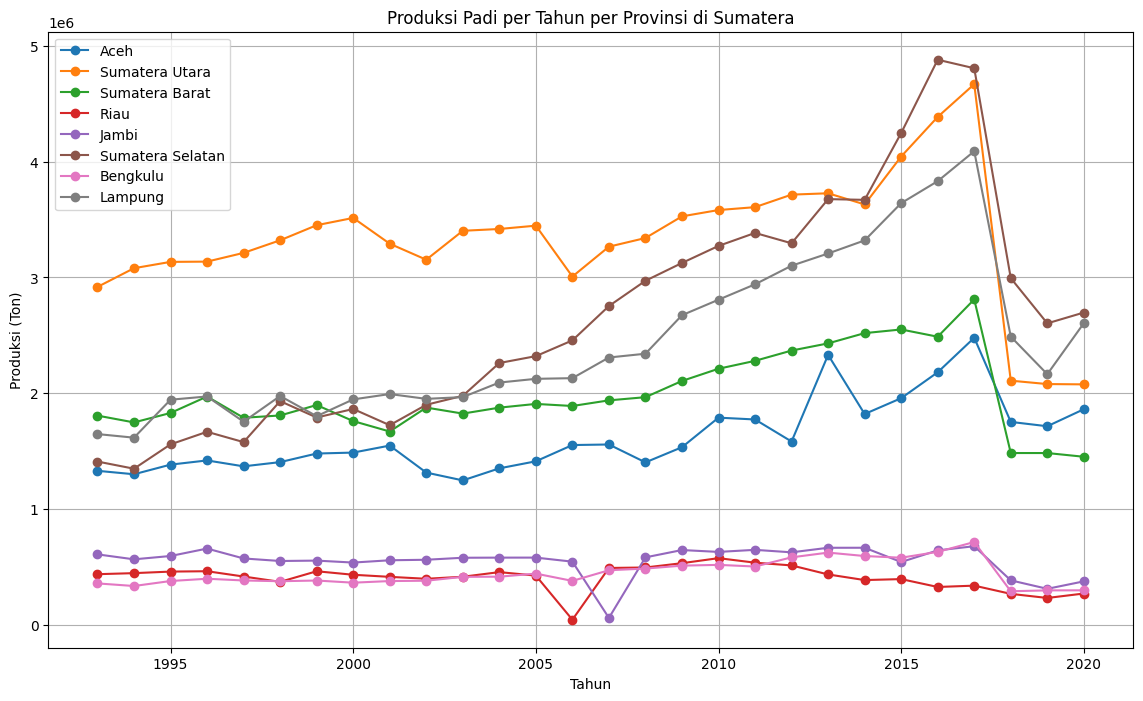

In [ ]:
# Visualisasi Produksi Padi per Tahun per Provinsi
plt.figure(figsize=(14, 8))
for provinsi in data['Provinsi'].unique():
    provinsi_data = data[data['Provinsi'] == provinsi]
    plt.plot(provinsi_data['Tahun'], provinsi_data['Produksi'], marker='o', label=provinsi)

plt.title('Produksi Padi per Tahun per Provinsi di Sumatera')
plt.xlabel('Tahun')
plt.ylabel('Produksi (Ton)')
plt.legend()
plt.grid(True)
plt.show()

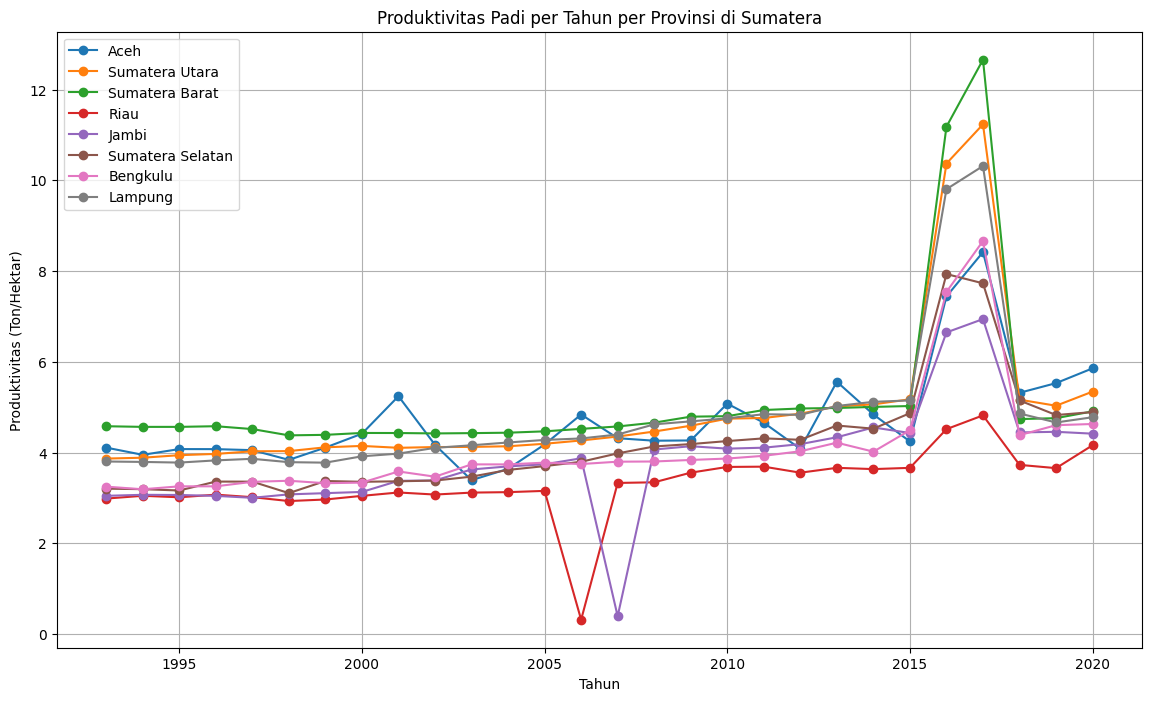

In [ ]:
# Visualisasi Produktivitas Padi per Tahun per Provinsi
plt.figure(figsize=(14, 8))
for provinsi in data['Provinsi'].unique():
    provinsi_data = data[data['Provinsi'] == provinsi]
    plt.plot(provinsi_data['Tahun'], provinsi_data['Produktivitas'], marker='o', label=provinsi)

plt.title('Produktivitas Padi per Tahun per Provinsi di Sumatera')
plt.xlabel('Tahun')
plt.ylabel('Produktivitas (Ton/Hektar)')
plt.legend()
plt.grid(True)
plt.show()